<a href="https://colab.research.google.com/github/Shaikmd3797/petrol-consumption/blob/main/petrol_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***developing the Machine Learning algorithm for petrol consumption of every countries in a world with the given data and find the important feature for pertol consumption***

# ***1)import necessasary module and read the csv data***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pet_con=pd.read_csv('petrol_consumption.csv')

# ***2)getting the information about the data set***

In [3]:
pet_con.shape

(48, 5)

In [4]:
pet_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [5]:
pet_con.head(3)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561


# **1st jar of machine learning -Data**
1. cleaning
2. encoding
3. spliting
4. scaling



## ***3)Cleaning the data is must to process with dataset***

## **i)find the missing values & remove it**

In [6]:
pet_con.isnull().sum() #sum of missing values in each column

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

# **ii) remove duplicates from dataset**

In [7]:
pet_con=pet_con.drop_duplicates()
pet_con.shape # shape of dataset after removing duplicates 

(48, 5)

# **iii) checking the correct format of data of each column**

In [8]:
pet_con.dtypes # data type of each column can be explained is the data has correct format or not.

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

**Ans**:  data format is correct of each column

# **iv)checking the data is structured data or not**

**Ans**:  the dataset has proper row and column-wise data. so the data is 

structured data

# **v)Finding the outliers and replace with the correct value**

In [9]:
pet_con.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [10]:
q1=pet_con.Petrol_tax.quantile(0.25)
q3=pet_con.Petrol_tax.quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print('petrol_tax range is :', upper,lower)
pet_con['Petrol_tax']=pet_con.Petrol_tax.clip(lower,upper) #exceed values should clip into upper threshold and lesser than of lower threshold clipping ito lower threshold

petrol_tax range is : 9.8125 5.3125


In [11]:
q1=pet_con.Average_income.quantile(0.25)
q3=pet_con.Average_income.quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print('Average_income	 range is :', upper,lower)
pet_con['Average_income']=pet_con.Average_income.clip(lower,upper)

Average_income	 range is : 5838.375 2479.375


In [12]:
q1=pet_con.Paved_Highways.quantile(0.25)
q3=pet_con.Paved_Highways.quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print('Paved_Highways	 range is :', upper,lower)
pet_con['Paved_Highways']=pet_con.Paved_Highways.clip(lower,upper)

Paved_Highways	 range is : 13224.625 -2958.375


In [13]:
q1=pet_con['Population_Driver_licence(%)'].quantile(0.25)
q3=pet_con['Population_Driver_licence(%)'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
print('Population_Driver_licence(%)	 range is :', upper,lower)
pet_con['Population_Driver_licence(%)']=pet_con['Population_Driver_licence(%)'].clip(lower,upper)

Population_Driver_licence(%)	 range is : 0.6934999999999998 0.4315000000000002


# ***vi)Plotting the EDA for finding the relantionship between features and target variable***

  when the correlation between feature vs target variable is more than 0.2 or less than -0.2 is consider as linear regression 

<function matplotlib.pyplot.show(*args, **kw)>

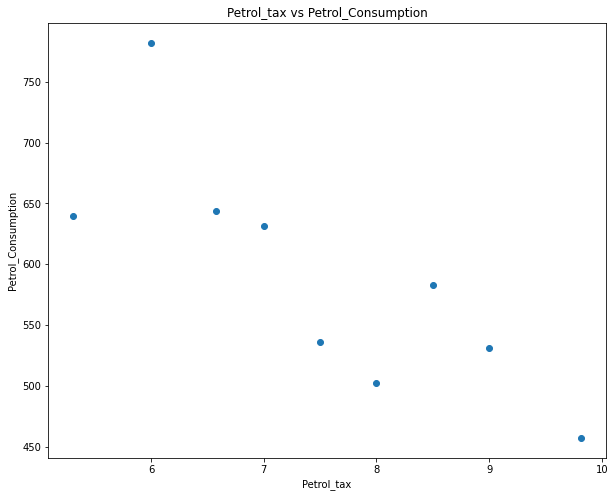

In [14]:
pet_con.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot(x='Petrol_tax',y='Petrol_Consumption',style='o',figsize=(10,8))
plt.title('Petrol_tax vs Petrol_Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol_Consumption')
plt.show

In [15]:
pet_con[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.000000,-0.455955
Petrol_Consumption,-0.455955,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

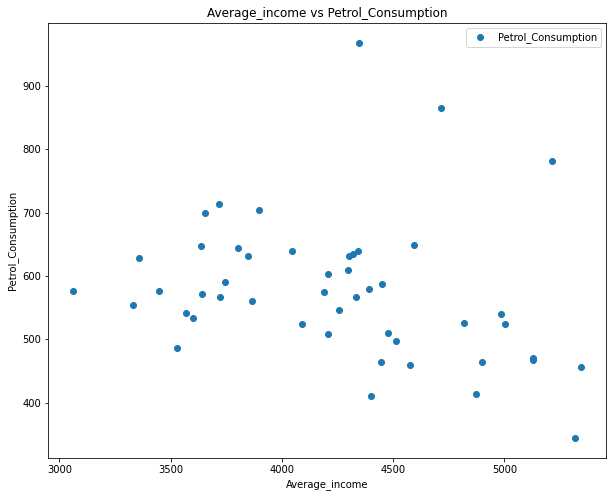

In [16]:
pet_con.plot(x='Average_income',y='Petrol_Consumption',style='o',figsize=(10,8))
plt.title('Average_income vs Petrol_Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol_Consumption')
plt.show

In [17]:
pet_con[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

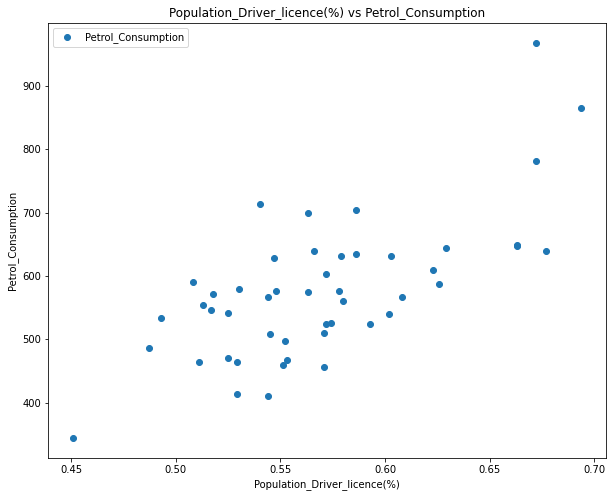

In [18]:
pet_con.plot(x='Population_Driver_licence(%)',y='Petrol_Consumption',style='o',figsize=(10,8))
plt.title('Population_Driver_licence(%) vs Petrol_Consumption')
plt.xlabel('Population_Driver_licence(%)')
plt.ylabel('Petrol_Consumption')
plt.show

In [19]:
pet_con[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

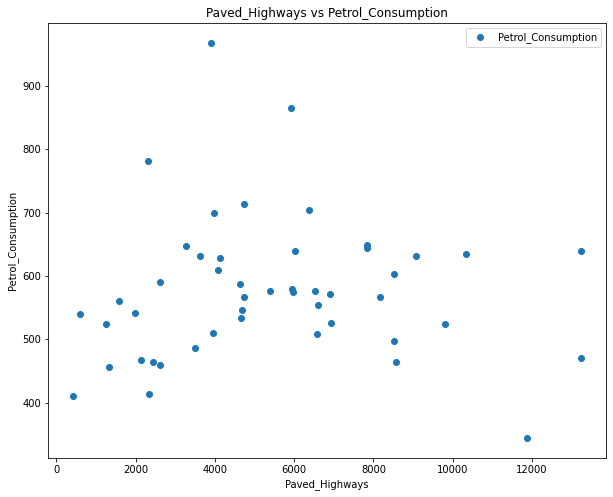

In [20]:
pet_con.plot(x='Paved_Highways',y='Petrol_Consumption',style='o',figsize=(10,8))
plt.title('Paved_Highways vs Petrol_Consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Petrol_Consumption')
plt.show

In [21]:
pet_con[['Paved_Highways','Petrol_Consumption']].corr()

,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.009852
Petrol_Consumption,0.009852,1.000000


** as this problem the correlation is between the range 0.2 to -0.2.so,we can tranform feature into basic numpy operation than check it gets linear**

<function matplotlib.pyplot.show(*args, **kw)>

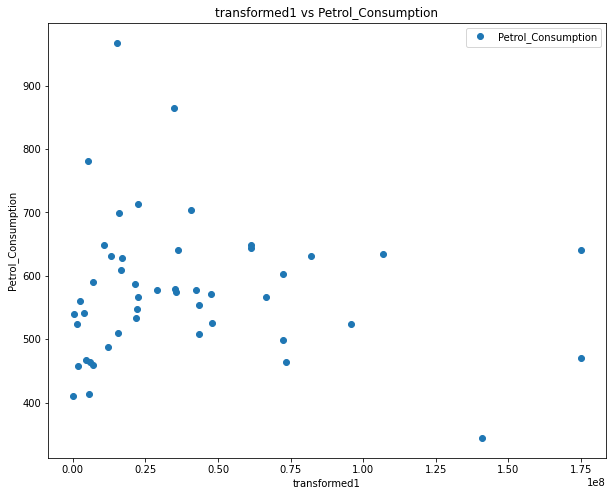

In [22]:
pet_con['transformed1']=np.power(pet_con['Paved_Highways'],2)
pet_con.plot(x='transformed1',y='Petrol_Consumption',style='o',figsize=(10,8))
plt.title('transformed1 vs Petrol_Consumption')
plt.xlabel('transformed1')
plt.ylabel('Petrol_Consumption')
plt.show


In [23]:
pet_con[['transformed1','Petrol_Consumption']].corr()

,transformed1,Petrol_Consumption
transformed1,1.000000,-0.090403
Petrol_Consumption,-0.090403,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

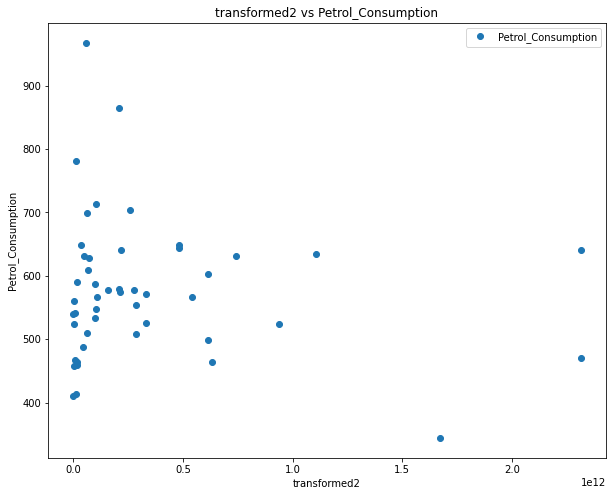

In [24]:
pet_con['transformed2']=np.power(pet_con['Paved_Highways'],3)
pet_con.plot(x='transformed2',y='Petrol_Consumption',style='o',figsize=(10,8))
plt.title('transformed2 vs Petrol_Consumption')
plt.xlabel('transformed2')
plt.ylabel('Petrol_Consumption')
plt.show

In [25]:
pet_con[['transformed2','Petrol_Consumption']].corr()

,transformed2,Petrol_Consumption
transformed2,1.000000,-0.134562
Petrol_Consumption,-0.134562,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

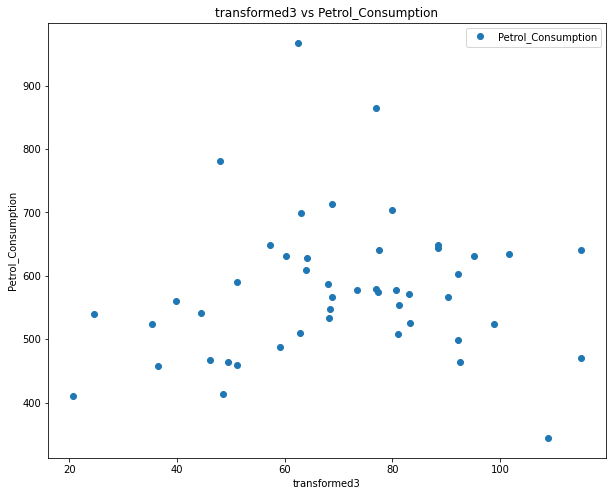

In [26]:
pet_con['transformed3']=np.power(pet_con['Paved_Highways'],0.5)
pet_con.plot(x='transformed3',y='Petrol_Consumption',style='o',figsize=(10,8))
plt.title('transformed3 vs Petrol_Consumption')
plt.xlabel('transformed3')
plt.ylabel('Petrol_Consumption')
plt.show

In [27]:
pet_con[['transformed3','Petrol_Consumption']].corr()

,transformed3,Petrol_Consumption
transformed3,1.000000,0.084753
Petrol_Consumption,0.084753,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

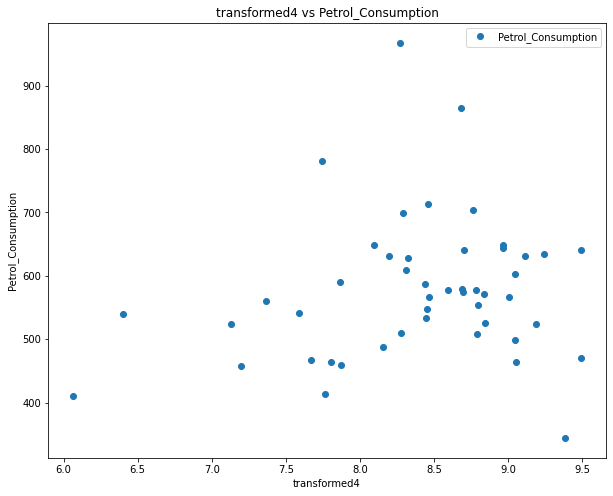

In [28]:
pet_con['transformed4']=np.log(pet_con['Paved_Highways'])
pet_con.plot(x='transformed4',y='Petrol_Consumption',style='o',figsize=(10,8))
plt.title('transformed4 vs Petrol_Consumption')
plt.xlabel('transformed4')
plt.ylabel('Petrol_Consumption')
plt.show

In [29]:
pet_con[['transformed4','Petrol_Consumption']].corr()

,transformed4,Petrol_Consumption
transformed4,1.000000,0.165334
Petrol_Consumption,0.165334,1.000000


/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


<function matplotlib.pyplot.show(*args, **kw)>

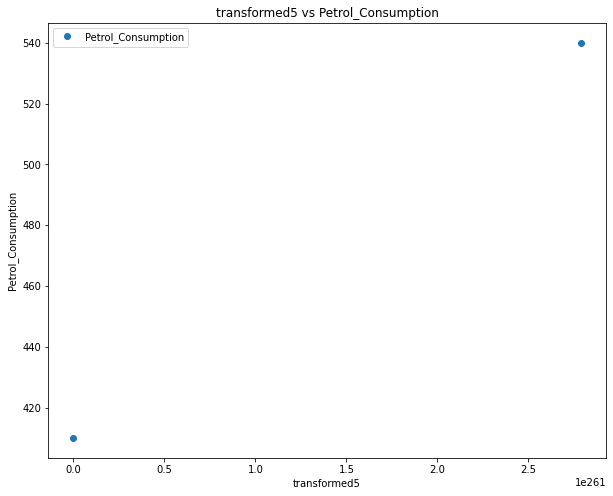

In [30]:
pet_con['transformed5']=np.exp(pet_con['Paved_Highways'])
pet_con.plot(x='transformed5',y='Petrol_Consumption',style='o',figsize=(10,8))
plt.title('transformed5 vs Petrol_Consumption')
plt.xlabel('transformed5')
plt.ylabel('Petrol_Consumption')
plt.show

In [31]:
pet_con[['transformed5','Petrol_Consumption']].corr()

,transformed5,Petrol_Consumption
transformed5,NaN,0.0
Petrol_Consumption,0.0,1.0


**No one tranformed correlation to give the linear relantionship between featue and target variable. so, we drop the feature**


In [32]:
features=['Petrol_tax','Average_income','Population_Driver_licence(%)']

# vii)encoding the data

1.the data is encoded when the data is charecteristic data.

result: petrol consumption data has not contain an any single charecteristic data.so the encoding is not needed for this data

# viii)spliting the data

1. the data will splitted into two parts. One is training data which has split 70-80% of entire data.
2. the anopther part is test data. it is contains 20-30 % of the entire data.
3. train data is used to develop the model.
4. test data is used to evaluate the data.

In [93]:
X=pet_con.loc[:,['Petrol_tax','Average_income','Population_Driver_licence(%)']] # features of linear relation to target variable
y=pet_con.loc[:,'Petrol_Consumption'] #target variable of the data

In [92]:
from sklearn.model_selection import train_test_split  # import the required module

In [106]:
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.3,  random_state=1977)

In [107]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    Petrol_tax  Average_income  Population_Driver_licence(%)
35      6.5800            3802                        0.6290
29      9.0000            3601                        0.4930
36      5.3125            4045                        0.5660
22      9.0000            4897                        0.5110
45      9.0000            4476                        0.5710
46      7.0000            4296                        0.6230
24      8.5000            4574                        0.5510
32      8.0000            3063                        0.5780
12      7.0000            4817                        0.5740
40      7.0000            4449                        0.6260
2       9.0000            3865                        0.5800
41      7.0000            3656                        0.5630
7       8.0000            5126                        0.5530
30      7.0000            3640                        0.5180
15      7.0000            4318                        0.5860
16      7.0000          

# ix) scaling of the data
 1. scaling the data is not mandatory for linear regression.
 2. here we scale the data for learning the ML
 


In [108]:
from sklearn.preprocessing import StandardScaler # import the module
scaler=StandardScaler()  # initialise the class
scaler.fit(X_train)   # fit the training data 
X_train_scale=scaler.transform(X_train) #transform the trained data
X_test_scale=scaler.transform(X_test)   #transform the data test data



# **2nd jar - Task**
1. Here we  predict the one target variable.so this is the supervised learning problems.
2. Target variable is continous data .so this is regression problem.
3. from the EDA, we conclude that this the linear regression problem.

# **3rd Jar is Model**

1. mathematical formula for linear regression is y=mX+c

 here,  
 y=target varaible,

  X=features, 

  m,c=parameters

       

# ***for this problem (m1*x1) + (m2*x2) + (m3*x3) + c =y**

# **4th jar is loss**
1. find the best parameter that has the least loss in my training data
2. MSE and MAE are act like as convex. Convex problem will 100% work on GD


# **5th Jar - learning**
1. GD will work 100% for linear regression.

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
reg=LinearRegression()

In [111]:
reg.fit(X_train_scale,y_train)

LinearRegression()

In [112]:
reg.coef_

array([-25.62560992, -37.06692574,  76.07284299])

In [113]:
reg.intercept_

578.4242424242424

In [114]:
y_predict=reg.predict(X_test_scale)
y_predict

array([494.76907865, 653.16152249, 534.34926316, 647.14209547,
       726.42580336, 584.40752045, 555.36426952, 725.39781843,
       572.76569644, 529.26531468, 723.54057596, 481.90402296,
       513.35502073, 304.78303825, 624.35685736])

In [115]:
coef = pd.DataFrame(reg.coef_, features , columns = ['coefficient'])
coef

,coefficient
Petrol_tax,-25.625610
Average_income,-37.066926
Population_Driver_licence(%),76.072843


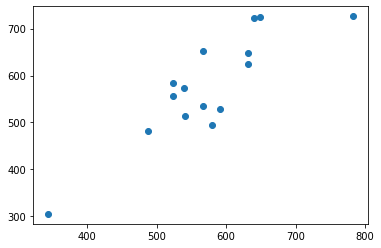

In [116]:
plt.scatter(y_test,y_predict)

# ***6th jar - evalute the model***
1. find the score of model using R2 value

In [117]:
from sklearn import metrics

In [118]:
metrics.r2_score(y_test,y_predict)

0.6571734821417792

In [119]:
reg.score(X_test_scale,y_test)

0.6571734821417792